# Naïve Bayes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

### Load the training, Testing and Evaluation Data

In [4]:
# Load the data
X_train = pd.read_pickle('model/X_train.pkl')
y_train = pd.read_pickle('model/y_train.pkl')
X_test = pd.read_pickle('model/X_test.pkl')
y_test = pd.read_pickle('model/y_test.pkl')
X_recommend = pd.read_pickle('model/X_recommend.pkl')

In [5]:
X_train.head()

,popularity,explicit,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,...,urban contemporary,vallenato,vapor trap,vapor twitch,video game music,viral pop,viral rap,weirdcore,west coast rap,yacht rock
1213,4,False,220653,0.780,0.856,10,-5.316,0,0.0405,0.11600,...,0,0,0,0,0,0,0,0,0,0
71,84,False,173333,0.726,0.431,8,-8.765,0,0.1350,0.73100,...,0,0,0,0,0,0,0,0,0,0
1058,0,False,182506,0.791,0.907,0,-2.223,1,0.0884,0.01320,...,0,0,0,0,0,0,0,0,0,0
756,77,True,205158,0.533,0.858,2,-4.212,1,0.0766,0.00021,...,0,0,0,0,0,0,0,0,0,0
317,62,False,109735,0.670,0.609,7,-10.088,1,0.0333,0.74900,...,0,0,0,0,0,0,0,0,0,0


We will not apply feature scaling since Naive Bayes algorithm is not affected by range of values of features

### Hyperparameter Tuning

We will tune for ```var_smoothing``` which is is a stability calculation to widen (or smooth) the curve and therefore account for more samples that are further away from the distribution mean.

In [6]:
# Check accuracy for each value for each hyperparameter in its range
# We will use GridSearchCV to automate this process

var_smoothing = np.logspace(0,-9, num=100)

# #Convert to dictionary
hyperparameters = dict(var_smoothing=var_smoothing)

print(hyperparameters)

{'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.31012970e-02, 1.87381742e-02,
       1.51991108e-02, 1.23284674e-02, 1.00000000e-02, 8.11130831e-03,
       6.57933225e-03, 5.33669923e-03, 4.32876128e-03, 3.51119173e-03,
       2.84803587e-03, 2.31012970e-03, 1.87381742e-03, 1.51991108e-03,
       1.23284674e-03, 1.00000000e-03, 8.11130831e-04, 6.57933225e-04,
       5.33669923e-04, 4.32876128e-04, 3.51119173e-04, 2.84803587e-04,
       2.31012970e-04, 1.87381742e-04, 1.51991108e-04, 1.23284674e-04,
       1.00000000e-04, 8.11130831e-05, 6.57933225e-05, 5.33669923e-05,
       4.32876128e-05, 3.51119173e-05, 2.84803587e-05, 2.31012970e-05,
       1.87381742e-05, 1.51991108e-05, 1.23284674e-05, 1.00

In [7]:
# estimator = ML model to be tested
# param_grid = dictionary of hyperparameters to be tested
# n_jobs = number of cores to be used in parallel, -1 means use all
# cv = number of cross validation set elements
# verbose = setting it to 2 will print updates to the terminal

best_model = GridSearchCV(estimator=GaussianNB(),
                         param_grid=hyperparameters,
                         n_jobs=-1,
                         cv=10,
                         verbose=2)

# Fit the model
best_model = best_model.fit(X_train,y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


In [8]:
var_smoothing = best_model.best_estimator_.get_params()['var_smoothing']

print(f'Best var_smoothing: {var_smoothing}')

Best var_smoothing: 1.2328467394420635e-09


### Model

In [9]:
# model
naive_bayes = GaussianNB(var_smoothing=var_smoothing)

# fit the model
naive_bayes.fit(X_train, y_train)

# prediction
predictions = naive_bayes.predict(X_test)

### Visualizing the Confusion Matrix

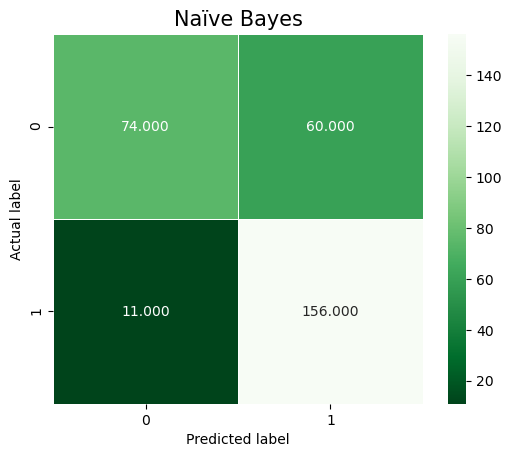

In [10]:
cm = confusion_matrix(y_test, predictions)
plt.figure()
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Greens_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Naïve Bayes', size = 15);
plt.show()

### Results

In [11]:
precision_macro_average = precision_score(y_test, predictions, average='macro')
precision_weighted_average = precision_score(y_test, predictions, average='weighted')

recall_macro_average = recall_score(y_test, predictions, average='macro')
recall_weighted_average = recall_score(y_test, predictions, average='weighted')

f1_macro_average = f1_score(y_test, predictions, average='macro')
f1_weighted_average = f1_score(y_test, predictions, average='weighted')


print(f'Precision (macro average)--> {round(precision_macro_average*100, 2)}%')
print(f'Precision (weighted average)--> {round(precision_weighted_average*100, 2)}%')

print(f'Recall (macro average)--> {round(recall_macro_average*100, 2)}%')
print(f'Recall (weighted average)--> {round(recall_weighted_average*100, 2)}%')

print(f'F1 score (macro average)--> {round(f1_macro_average*100, 2)}%')
print(f'F1 score (weighted average)--> {round(f1_weighted_average*100, 2)}%')

Precision (macro average)--> 79.64%
Precision (weighted average)--> 78.83%
Recall (macro average)--> 74.32%
Recall (weighted average)--> 76.41%
F1 score (macro average)--> 74.52%
F1 score (weighted average)--> 75.28%


In [12]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.87      0.55      0.68       134
           1       0.72      0.93      0.81       167

    accuracy                           0.76       301
   macro avg       0.80      0.74      0.75       301
weighted avg       0.79      0.76      0.75       301



#### This model was good